In [13]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras import  applications
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
BASE_DIR = os.path.dirname(os.getcwd())
BASE_DIR

'c:\\Users\\PC\\Desktop\\UIT\\TU_CHON_TU_DO\\CS406_XU_LY_ANH_VA_UNG_DUNG\\image-classification'

In [3]:
TEST_DIR = os.path.join(BASE_DIR, "dataset", "test")
TEST_DIR

'c:\\Users\\PC\\Desktop\\UIT\\TU_CHON_TU_DO\\CS406_XU_LY_ANH_VA_UNG_DUNG\\image-classification\\dataset\\test'

In [4]:
CHECKPOINT_DIR = os.path.join(BASE_DIR, "checkpoints")
CHECKPOINT_DIR

'c:\\Users\\PC\\Desktop\\UIT\\TU_CHON_TU_DO\\CS406_XU_LY_ANH_VA_UNG_DUNG\\image-classification\\checkpoints'

In [5]:
MODELS = [
    "EfficientNetB5",
    "DenseNet121",
    "ResNet50V2",
    "MobileNetV2",
]

In [6]:
PREPROCESSOR = {
    "EfficientNetB5": applications.efficientnet.preprocess_input,
    "DenseNet121": applications.densenet.preprocess_input,
    "ResNet50V2": applications.resnet_v2.preprocess_input,
    "MobileNetV2": applications.mobilenet_v2.preprocess_input,
}

In [7]:
def create_datasets(preprocess_fn, test_dir, BATCH_SIZE=32, IMG_SIZE=(224, 224), SEED=24520152):
    """
    Create Tensorflow datasets for testing

    Args:
        preprocess_fn (callable): The preprocessing function specific to the model (e.g., tf.keras.applications.efficientnet.preprocess_input)
        test_dir (str): Path to the testing image directory
        BATCH_SIZE (int): Batch size
        IMG_SIZE (tuple): Target image size
        SEED (int): Random seed for reproducibility

    Returns:
        val_ds (tf.data.Dataset): Preprocessed testing dataset
    """
    val_ds = tf.keras.utils.image_dataset_from_directory(
        test_dir,
        batch_size=BATCH_SIZE,
        image_size=IMG_SIZE,
        shuffle=False,
        seed=SEED,
    )

    AUTOTUNE = tf.data.AUTOTUNE

    def preprocess_val(image, label):
        """Apply preprocessing to the validation set (no augmentation)"""
        image = preprocess_fn(image)
        return image, label

    val_ds = val_ds.cache().map(preprocess_val, num_parallel_calls=AUTOTUNE).prefetch(buffer_size=AUTOTUNE)

    return val_ds

In [8]:
results = []

for model_name in MODELS:
    print(f"\nEvaluating {model_name}")
    best_model_path = os.path.join(CHECKPOINT_DIR, f"{model_name}_best.keras")
    if os.path.exists(best_model_path):
        model = tf.keras.models.load_model(best_model_path)
    else:
        raise FileNotFoundError(f"Not found {model_name} at {best_model_path}")

    preprocess_fn = PREPROCESSOR[model_name]
    test_ds = create_datasets(preprocess_fn=preprocess_fn, test_dir=TEST_DIR)

    loss, acc = model.evaluate(test_ds, verbose=1)
    results.append({
        "Model": model_name,
        "Loss": loss,
        "Accuracy": acc,
    })


Evaluating EfficientNetB5
Found 3000 files belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step - accuracy: 0.9190 - loss: 0.2141

Evaluating DenseNet121
Found 3000 files belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.9123 - loss: 0.2336

Evaluating ResNet50V2
Found 3000 files belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 80s 805ms/step - accuracy: 0.9110 - loss: 0.2367

Evaluating MobileNetV2
Found 3000 files belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 31s 286ms/step - accuracy: 0.9097 - loss: 0.2427


In [9]:
results_df = pd.DataFrame(results)
results_df = results_df.sort_values("Accuracy", ascending=False).reset_index(drop=True)
results_df.style.background_gradient(cmap="Blues", subset="Accuracy")

,Model,Loss,Accuracy
0,EfficientNetB5,0.214142,0.919000
1,DenseNet121,0.233558,0.912333
2,ResNet50V2,0.236682,0.911000
3,MobileNetV2,0.242693,0.909667


In [10]:
all_items = os.listdir(TEST_DIR)
all_items

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [11]:
class_labels = sorted([item for item in all_items if os.path.isdir(os.path.join(TEST_DIR, item))])
class_labels

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

Found 3000 files belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 141s 1s/step
              precision    recall  f1-score   support

   buildings       0.94      0.92      0.93       437
      forest       0.98      1.00      0.99       474
     glacier       0.92      0.78      0.84       553
    mountain       0.83      0.91      0.87       525
         sea       0.95      0.98      0.96       510
      street       0.93      0.95      0.94       501

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



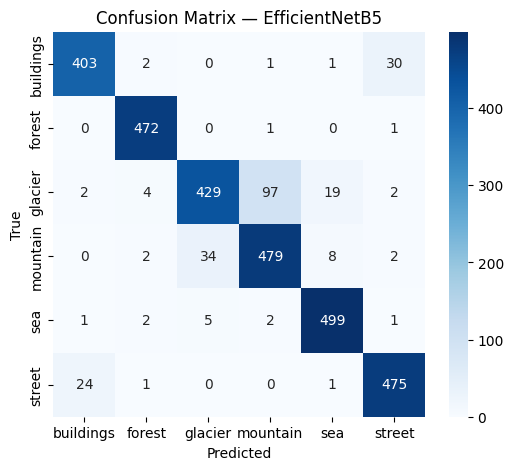

Found 3000 files belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step
              precision    recall  f1-score   support

   buildings       0.94      0.86      0.90       437
      forest       0.99      1.00      0.99       474
     glacier       0.88      0.82      0.85       553
    mountain       0.85      0.88      0.86       525
         sea       0.94      0.97      0.96       510
      street       0.88      0.96      0.92       501

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



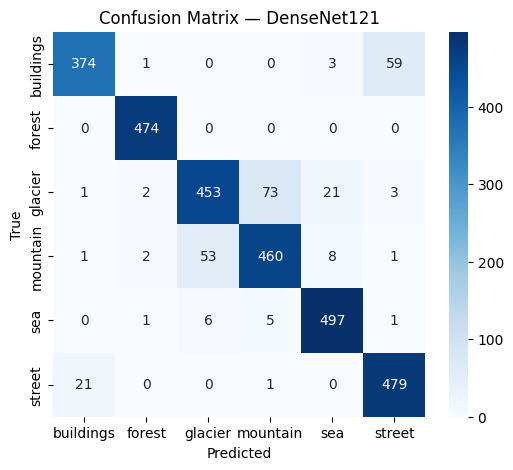

Found 3000 files belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 72s 739ms/step
              precision    recall  f1-score   support

   buildings       0.93      0.92      0.92       437
      forest       0.97      0.99      0.98       474
     glacier       0.84      0.84      0.84       553
    mountain       0.85      0.84      0.84       525
         sea       0.96      0.94      0.95       510
      street       0.94      0.95      0.94       501

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



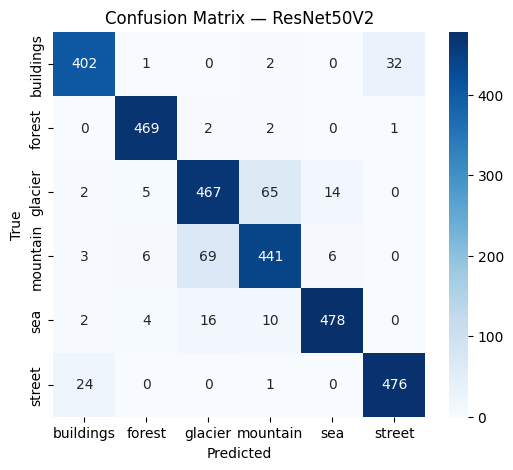

Found 3000 files belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 27s 267ms/step
              precision    recall  f1-score   support

   buildings       0.93      0.91      0.92       437
      forest       0.99      0.99      0.99       474
     glacier       0.83      0.85      0.84       553
    mountain       0.86      0.82      0.84       525
         sea       0.95      0.95      0.95       510
      street       0.91      0.95      0.93       501

    accuracy                           0.91      3000
   macro avg       0.91      0.91      0.91      3000
weighted avg       0.91      0.91      0.91      3000



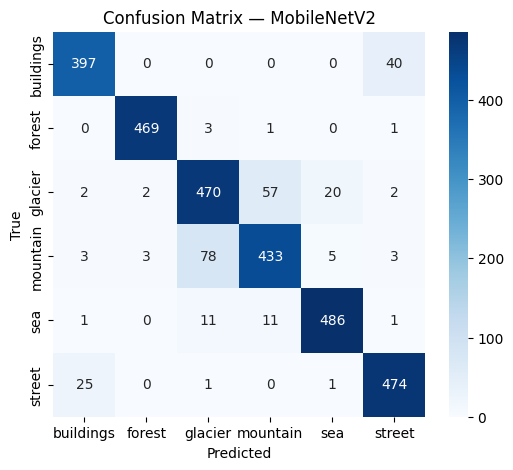

In [16]:
for model_name in MODELS:
    model = tf.keras.models.load_model(os.path.join(CHECKPOINT_DIR, f"{model_name}_best.keras"))
    preprocess_fn = PREPROCESSOR[model_name]
    test_ds = create_datasets(preprocess_fn=preprocess_fn, test_dir=TEST_DIR)

    y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
    y_pred = np.argmax(model.predict(test_ds), axis=1)

    print(classification_report(y_true, y_pred, target_names=class_labels))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"Confusion Matrix — {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [17]:
finetune_results = []

for model_name in MODELS:
    print(f"\nEvaluating {model_name}")
    best_model_path = os.path.join(CHECKPOINT_DIR, f"{model_name}_finetune.keras")
    if os.path.exists(best_model_path):
        model = tf.keras.models.load_model(best_model_path)
    else:
        raise FileNotFoundError(f"Not found {model_name} at {best_model_path}")

    preprocess_fn = PREPROCESSOR[model_name]
    test_ds = create_datasets(preprocess_fn=preprocess_fn, test_dir=TEST_DIR)

    loss, acc = model.evaluate(test_ds, verbose=1)
    finetune_results.append({
        "Model": model_name,
        "Loss": loss,
        "Accuracy": acc,
    })


Evaluating EfficientNetB5
Found 3000 files belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 171s 2s/step - accuracy: 0.9310 - loss: 0.1881

Evaluating DenseNet121
Found 3000 files belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.9217 - loss: 0.2142

Evaluating ResNet50V2
Found 3000 files belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 70s 705ms/step - accuracy: 0.9247 - loss: 0.2100

Evaluating MobileNetV2
Found 3000 files belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 28s 262ms/step - accuracy: 0.9250 - loss: 0.2061


In [18]:
finetune_results_df = pd.DataFrame(finetune_results)
finetune_results_df = finetune_results_df.sort_values("Accuracy", ascending=False).reset_index(drop=True)
finetune_results_df.style.background_gradient(cmap="Blues", subset="Accuracy")

,Model,Loss,Accuracy
0,EfficientNetB5,0.188072,0.931000
1,MobileNetV2,0.206071,0.925000
2,ResNet50V2,0.210012,0.924667
3,DenseNet121,0.214196,0.921667


Found 3000 files belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 160s 2s/step
              precision    recall  f1-score   support

   buildings       0.93      0.94      0.94       437
      forest       0.99      1.00      1.00       474
     glacier       0.90      0.85      0.87       553
    mountain       0.88      0.88      0.88       525
         sea       0.95      0.99      0.97       510
      street       0.95      0.94      0.94       501

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.93      0.93      0.93      3000



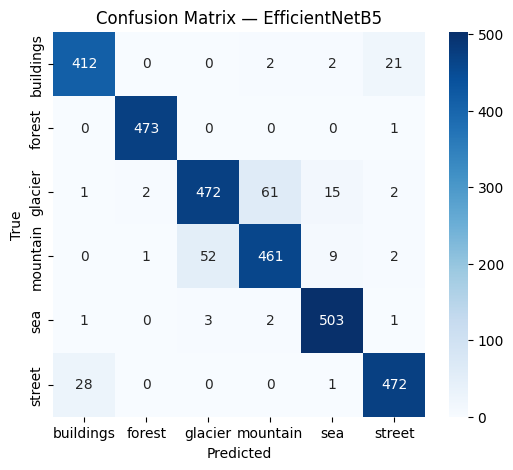

Found 3000 files belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 118s 1s/step
              precision    recall  f1-score   support

   buildings       0.93      0.90      0.91       437
      forest       0.99      1.00      0.99       474
     glacier       0.87      0.87      0.87       553
    mountain       0.90      0.84      0.87       525
         sea       0.94      0.99      0.96       510
      street       0.92      0.94      0.93       501

    accuracy                           0.92      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.92      0.92      0.92      3000



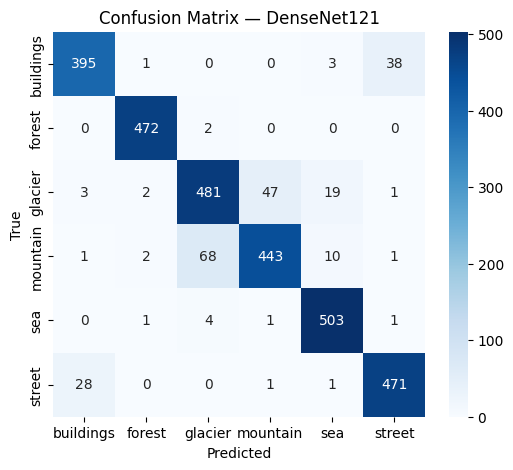

Found 3000 files belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 71s 729ms/step
              precision    recall  f1-score   support

   buildings       0.94      0.93      0.93       437
      forest       0.98      0.99      0.98       474
     glacier       0.87      0.88      0.87       553
    mountain       0.89      0.84      0.86       525
         sea       0.94      0.97      0.96       510
      street       0.94      0.95      0.95       501

    accuracy                           0.92      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.92      0.92      0.92      3000



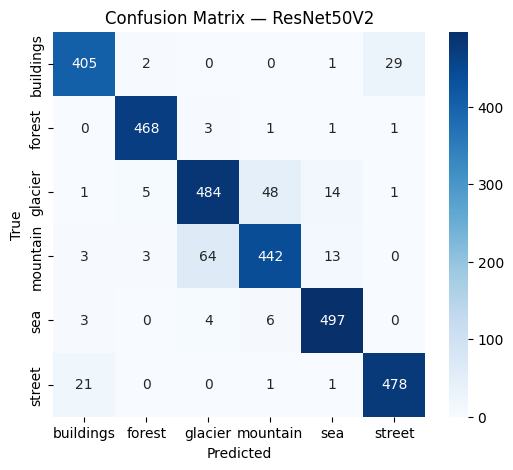

Found 3000 files belonging to 6 classes.
94/94 ━━━━━━━━━━━━━━━━━━━━ 27s 277ms/step
              precision    recall  f1-score   support

   buildings       0.94      0.92      0.93       437
      forest       0.98      0.99      0.99       474
     glacier       0.90      0.85      0.87       553
    mountain       0.88      0.87      0.88       525
         sea       0.92      0.98      0.95       510
      street       0.94      0.95      0.94       501

    accuracy                           0.93      3000
   macro avg       0.93      0.93      0.93      3000
weighted avg       0.92      0.93      0.92      3000



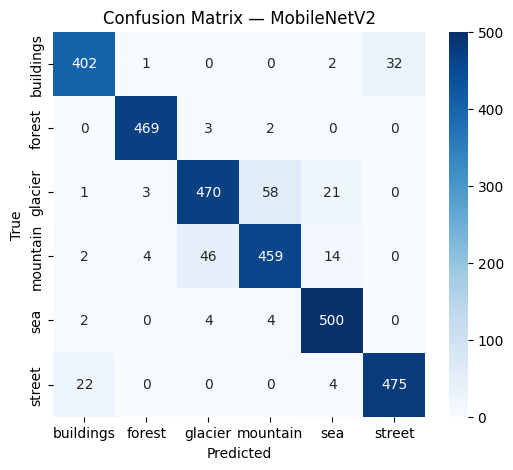

In [19]:
for model_name in MODELS:
    model = tf.keras.models.load_model(os.path.join(CHECKPOINT_DIR, f"{model_name}_finetune.keras"))
    preprocess_fn = PREPROCESSOR[model_name]
    test_ds = create_datasets(preprocess_fn=preprocess_fn, test_dir=TEST_DIR)

    y_true = np.concatenate([y.numpy() for _, y in test_ds], axis=0)
    y_pred = np.argmax(model.predict(test_ds), axis=1)

    print(classification_report(y_true, y_pred, target_names=class_labels))

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)
    plt.title(f"Confusion Matrix — {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()